In [24]:
import numpy as np                     

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt       
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality


# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots

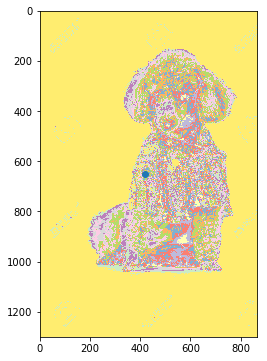

In [34]:
img = mpimg.imread('/Users/IS/Desktop/images1/image_1988.jpg')
cy, cx = ndi.center_of_mass(img)

plt.imshow(img, cmap='Set3')  #display picture
plt.scatter(cx, cy)           #show center of photo
plt.show()

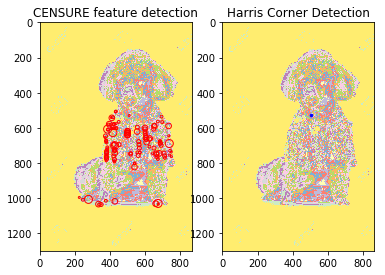

In [38]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

detector = CENSURE()
detector.detect(img)

coords = corner_peaks(corner_harris(img), min_distance=5)
coords_subpix = corner_subpix(img, coords, window_size=13)

plt.subplot(121)
plt.title('CENSURE feature detection')
plt.imshow(img, cmap='Set3')
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')

plt.subplot(122)
plt.title('Harris Corner Detection')
plt.imshow(img, cmap='Set3')
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
plt.show()
